We need to provide SSP2 data for 2081 - 2100.

We have SSP1 and SSP3.

### We asume SSP2 is somewhere in the middle of SSP1 and SSP3

See report, a value is 0.5 is selected to scale SSP1 and SSP3 based on the global temperature trends of the GCM

A seperate code is availble for Northern

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

##### The daily count of fires is hence in between SSP1 and SSP3 (here we assume in the middle)

In [4]:
def round_half_up(x):
    return np.floor(x + 0.5)

In [5]:
folder = "ML-data-Europe-gridded"

In [6]:
path = "O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/"+ folder + "/results/climex/"

In [10]:
start_year = '2081'
end_year = '2100'
ens = 'etp'
mid_century = False
save = False

In [11]:
df_eop = pd.read_csv(path + 'eop/df_count.csv')

In [12]:
df_etp = pd.read_csv(path + 'etp/df_count.csv')

In [13]:
df_epp = pd.read_csv(path + 'epp/df_count.csv')

In [14]:
n_fires_etp = np.nansum(df_etp['count'])
print(n_fires_etp)

30898.0


In [15]:
n_fires_eop = np.nansum(df_eop['count'])
print(n_fires_eop)

15353.0


In [16]:
n_fires_epp = np.nansum(df_epp['count'])
print(n_fires_epp)

11400.0


#### Obtain end of century ssp2 value

In [17]:
fires_ssp2_end = round_half_up((df_eop['count'] + df_etp['count'])/2)

In [18]:
n_fires_ssp2_end = np.nansum(fires_ssp2_end)

In [19]:
n_fires_ssp2_end 

23917.0

#### Obtain mid century ssp2 value

In [20]:
T_ssp2 = 280.6
T_hist = 278.7
T_x = 279.9
n_fires_ssp2_mid = n_fires_epp + (n_fires_ssp2_end - n_fires_epp)/(T_ssp2 - T_hist)*(T_x - T_hist)
print(n_fires_ssp2_mid)

19305.47368421031


In [21]:
factor = n_fires_ssp2_mid/n_fires_ssp2_end

In [22]:
factor

0.8071862559773512

In [23]:
fires_ssp2_mid = np.round((df_eop['count'] + df_etp['count']) /2 * factor, 0)

In [24]:
print(np.nansum(fires_ssp2_mid))

18496.0


In [25]:
dates = df_etp['Unnamed: 0'].values

In [26]:
df_count = pd.DataFrame(index = dates)

In [27]:
df_count['count'] = ''

In [28]:
if mid_century == True:
    df_count['count'] = fires_ssp2_mid.values
else:
    df_count['count'] = fires_ssp2_end.values

In [29]:
fires_ssp2_mid.values

array([4., 4., 3., ..., 2., 2., 2.])

#### Plot results

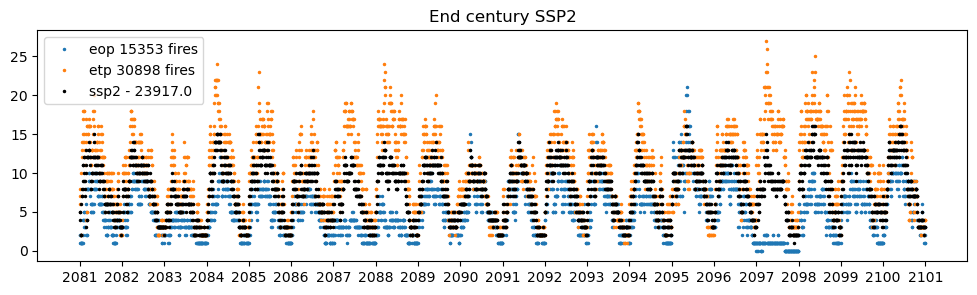

In [34]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(df_eop['count'], '.', label = 'eop ' + str(int(sum(df_eop['count']))) + ' fires', ms = 3)
ax.plot(df_etp['count'], '.', label = 'etp '+ str(int(sum(df_etp['count']))) + ' fires', ms = 3)
ax.plot(df_count['count'], '.', label = 'ssp2 - ' + str(np.nansum(df_count['count'])), c = 'k', ms = 3)
ax.set_xticks(np.arange(0, len(df_eop)+1, 153))
ax.set_xticklabels(np.arange(2081, 2102, 1))
ax.legend()
if mid_century == True:
    ax.set_title('Mid century SSP2')
else:
    ax.set_title('End century SSP2')
    

In [35]:
df_count

,count
2081-06-01,5.0
2081-06-02,5.0
2081-06-03,4.0
2081-06-04,2.0
2081-06-05,2.0
...,...
2100-10-27,3.0
2100-10-28,3.0
2100-10-29,3.0
2100-10-30,3.0


### Find location

The probabilities are selected from the SSP3 scenario

In [38]:
select_type = 'thresh' # or dice 

In [39]:
start_year = '2081'
end_year = '2100'


In [40]:
# Fire probability
ens = 'etp'
df_probs = pd.read_csv(path + '/'+ ens + '/daily_probas_' + start_year + '-' + end_year + '_fire-season.csv')

In [41]:
df_probs = df_probs.set_index(np.int64(df_probs.id))


In [42]:
df_probs= df_probs.iloc[:, 1:]


In [43]:
df_probs = df_probs.drop(columns = 'mean')

In [44]:
df_probs

,2081-06-01,2081-06-02,2081-06-03,2081-06-04,2081-06-05,2081-06-06,2081-06-07,2081-06-08,2081-06-09,2081-06-10,...,2100-10-22,2100-10-23,2100-10-24,2100-10-25,2100-10-26,2100-10-27,2100-10-28,2100-10-29,2100-10-30,2100-10-31
68467,0.100000,0.140000,0.093333,0.026667,0.040000,0.120000,0.026667,0.033333,0.160000,0.213333,...,0.226667,0.260000,0.220000,0.220000,0.186667,0.180000,0.193333,0.206667,0.193333,0.200000
68468,0.113333,0.153333,0.113333,0.053333,0.073333,0.140000,0.060000,0.086667,0.220000,0.273333,...,0.253333,0.253333,0.253333,0.246667,0.226667,0.220000,0.220000,0.253333,0.233333,0.253333
68474,0.086667,0.093333,0.086667,0.060000,0.093333,0.080000,0.046667,0.080000,0.086667,0.113333,...,0.160000,0.146667,0.146667,0.153333,0.166667,0.160000,0.160000,0.153333,0.153333,0.166667
68475,0.166667,0.166667,0.180000,0.073333,0.100000,0.146667,0.140000,0.100000,0.106667,0.233333,...,0.306667,0.313333,0.326667,0.313333,0.326667,0.280000,0.306667,0.313333,0.306667,0.306667
68476,0.166667,0.233067,0.153333,0.093333,0.173333,0.266667,0.160000,0.180000,0.213333,0.253333,...,0.306667,0.266667,0.286667,0.266667,0.260000,0.353333,0.260000,0.280000,0.266667,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110367,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,...,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667
112786,0.280000,0.226667,0.193333,0.353333,0.233333,0.360000,0.220000,0.206667,0.093333,0.213333,...,0.233333,0.146667,0.280000,0.140000,0.213333,0.226667,0.193333,0.153333,0.206667,0.133333
113006,0.626667,0.640000,0.520000,0.566667,0.353333,0.580000,0.526667,0.546667,0.240000,0.566667,...,0.573333,0.553333,0.646667,0.440000,0.613333,0.606667,0.560000,0.373333,0.660000,0.573333
113226,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,...,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000


In [45]:
# Update column names to date times 
dates = pd.date_range(start_year + '-01-07', end_year + '-12-24')

# Only fire season so months outside fire season are filtered out 
for m in [1, 2, 3, 4, 5, 11, 12]:
    dates = dates[ ~(dates.month == m)]

df_probs = df_probs.set_axis(dates, axis=1)

In [46]:
df_probs

,2081-06-01,2081-06-02,2081-06-03,2081-06-04,2081-06-05,2081-06-06,2081-06-07,2081-06-08,2081-06-09,2081-06-10,...,2100-10-22,2100-10-23,2100-10-24,2100-10-25,2100-10-26,2100-10-27,2100-10-28,2100-10-29,2100-10-30,2100-10-31
68467,0.100000,0.140000,0.093333,0.026667,0.040000,0.120000,0.026667,0.033333,0.160000,0.213333,...,0.226667,0.260000,0.220000,0.220000,0.186667,0.180000,0.193333,0.206667,0.193333,0.200000
68468,0.113333,0.153333,0.113333,0.053333,0.073333,0.140000,0.060000,0.086667,0.220000,0.273333,...,0.253333,0.253333,0.253333,0.246667,0.226667,0.220000,0.220000,0.253333,0.233333,0.253333
68474,0.086667,0.093333,0.086667,0.060000,0.093333,0.080000,0.046667,0.080000,0.086667,0.113333,...,0.160000,0.146667,0.146667,0.153333,0.166667,0.160000,0.160000,0.153333,0.153333,0.166667
68475,0.166667,0.166667,0.180000,0.073333,0.100000,0.146667,0.140000,0.100000,0.106667,0.233333,...,0.306667,0.313333,0.326667,0.313333,0.326667,0.280000,0.306667,0.313333,0.306667,0.306667
68476,0.166667,0.233067,0.153333,0.093333,0.173333,0.266667,0.160000,0.180000,0.213333,0.253333,...,0.306667,0.266667,0.286667,0.266667,0.260000,0.353333,0.260000,0.280000,0.266667,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110367,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,...,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667
112786,0.280000,0.226667,0.193333,0.353333,0.233333,0.360000,0.220000,0.206667,0.093333,0.213333,...,0.233333,0.146667,0.280000,0.140000,0.213333,0.226667,0.193333,0.153333,0.206667,0.133333
113006,0.626667,0.640000,0.520000,0.566667,0.353333,0.580000,0.526667,0.546667,0.240000,0.566667,...,0.573333,0.553333,0.646667,0.440000,0.613333,0.606667,0.560000,0.373333,0.660000,0.573333
113226,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,...,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000


In [47]:
select_type = 'thresh' # or dice 

In [48]:
df_probs['id'] = df_probs.index

In [49]:
years = np.arange(int(start_year), int(end_year)+1, 1)
prob = 0.7 # select threshold value

In [50]:
df_ignition = pd.DataFrame(columns = ['date', 'id'])

i = 0
for year in years: 
    year = str(year)
    df = df_probs.filter(like= year)
    
    for column_name, item in df.items():
        
        # Random probability
        vals = np.zeros(len(item))
        random_probas = np.random.rand(len(item))

        # Use sample function to select ids based on condition
        if select_type == 'thresh':
            indices = df_probs['id'][item > prob].sample(int(np.round(df_count['count'][i],0)))
        elif select_type == 'dice':
            indices = df_probs['id'][item > random_probas].sample(int(np.round(df_count['count'][i],0)))

        # Create a dataframe with a row per fire 
        for ind in indices:
            df_temp = pd.DataFrame({"date":[str(column_name)[:10]], "id": [ind]})
            df_ignition = pd.concat([df_ignition, df_temp], ignore_index=True)
            
        i = i +1   

C:\Users\ophme\AppData\Local\Temp\ipykernel_49148\1177493430.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indices = df_probs['id'][item > prob].sample(int(np.round(df_count['count'][i],0)))


In [51]:
df_ignition

,date,id
0,2081-06-01,103985
1,2081-06-01,99368
2,2081-06-01,96038
3,2081-06-01,101335
4,2081-06-01,53158
...,...,...
23912,2100-10-30,41242
23913,2100-10-30,41018
23914,2100-10-31,38833
23915,2100-10-31,46091


#### Assign geometry to corresponding id

In [52]:
grid = gpd.read_file("O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/"+ folder +"/grid/europe_10km_grid.shp")

In [53]:
grid = grid[['id', 'geometry']].to_crs(4326)

In [54]:
grid['id'] = grid['id'].astype('int')

In [55]:
grid = grid.set_index('id')

In [56]:
geometries = []
for i, row in df_ignition.iterrows():
    geometries.append(grid.loc[row.id, 'geometry'])

In [57]:
df_ignition['geometry'] = geometries

#### Convert to geopandas and sample point randomly within grid 

In [58]:
df_ignition_gpd = gpd.GeoDataFrame(df_ignition, geometry=df_ignition["geometry"])

In [59]:
df_ignition_gpd['sample_point'] = df_ignition_gpd.geometry.sample_points(1)

In [60]:
df_ignition['lon'] = df_ignition_gpd.sample_point.x
df_ignition['lat'] = df_ignition_gpd.sample_point.y

In [61]:
df_ignition

,date,id,geometry,lon,lat
0,2081-06-01,103985,MULTIPOLYGON (((25.0820066359614 37.0513670580...,25.149915,37.074508
1,2081-06-01,99368,"POLYGON ((22.72577533093595 37.21235831539809,...",22.811894,37.151107
2,2081-06-01,96038,POLYGON ((21.518783644055546 40.10945296179066...,21.594033,40.009527
3,2081-06-01,101335,POLYGON ((24.044965337994917 38.21573851088039...,23.971028,38.185558
4,2081-06-01,53158,POLYGON ((-1.0297297862927175 38.3405522981982...,-0.978608,38.321526
...,...,...,...,...,...
23912,2100-10-30,41242,"POLYGON ((-7.912866595156196 40.6104755408059,...",-7.863614,40.557677
23913,2100-10-30,41018,POLYGON ((-8.131175456442765 40.93936647267179...,-8.010935,40.930220
23914,2100-10-31,38833,POLYGON ((-8.885483150737972 39.40775956871408...,-8.877897,39.397970
23915,2100-10-31,46091,POLYGON ((-5.165775582179088 40.24977439853572...,-5.084707,40.195253


#### Save list of points

In [62]:
path = "O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/"+ folder + "/"

In [63]:
if mid_century == True:
    start_year = 2041
    end_year = 2060

In [64]:
if save == True:
    df_ignition.drop(columns = ['id', 'geometry']).to_csv(path + 'results/ignition-selection/fire-season-ignition-points-' + str(start_year) + '-' + str(end_year) + '-' + select_type + '07_climex_' + ens +  '_ssp2.csv')

### 4. Visualise results 

#### Groupd by id and counter the number of fires per id

In [65]:
new_data = df_ignition.groupby('id').size().reset_index(name='count')
len(new_data)

5130

In [67]:
for i, row in new_data.iterrows():
    new_data.loc[i, 'geometry'] = grid.loc[row.id, :].geometry

In [68]:
new_data = gpd.GeoDataFrame(new_data, geometry=new_data["geometry"])


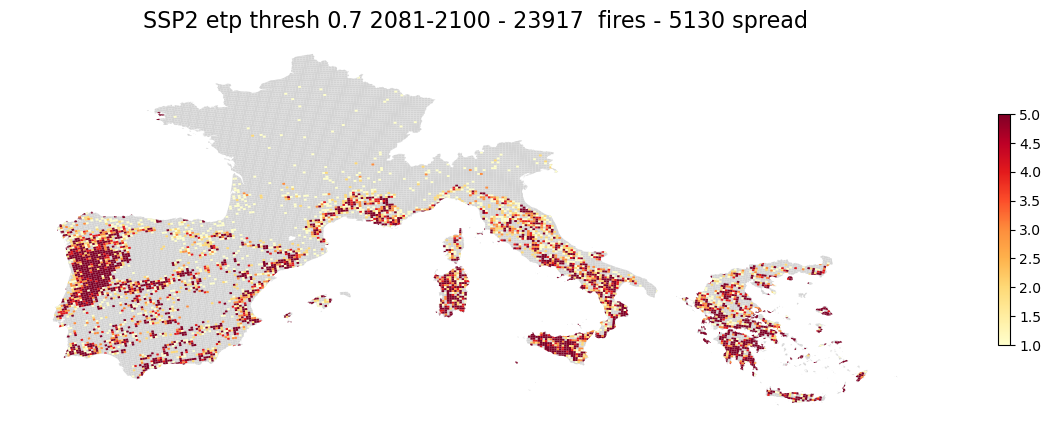

In [69]:
fig, ax = plt.subplots(figsize = (15, 6))
grid.plot(color = 'lightgrey', ax = ax, zorder = 0)
new_data.plot('count', ax = ax, cmap = 'YlOrRd', legend = True, vmin = 1, vmax = 5, legend_kwds={
        "shrink":.5   },)
#fires.plot(ax = ax,  color = 'k', zorder = 10)
if select_type == 'dice':
    ax.set_title(select_type, fontsize = 12)
else:
   ax.set_title('SSP2 ' + ens + ' ' + select_type + ' ' + str(prob) +' ' + str(start_year) + '-' + str(end_year) + ' - ' + str(len(df_ignition)) + '  fires - ' + str(len(new_data)) + ' spread' , fontsize = 16)
#
ax.set_axis_off()